<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/animalClass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [28]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

In [29]:
# Skip this cell if you already have duckduckgo_search installed
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from fastbook import search_images_ddg
urls = search_images_ddg('lion photos', max_images=1)
urls[0]

'https://wallup.net/wp-content/uploads/2016/01/205798-animals-lion.jpg'

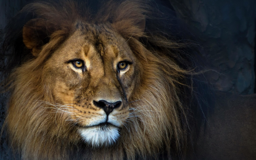

In [31]:
from fastdownload import download_url
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

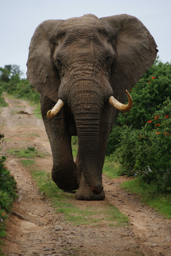

In [32]:
download_url(search_images_ddg('elephant photos', max_images=1)[0], 'elephant.jpg', show_progress=False)
Image.open('elephant.jpg').to_thumb(256,256)

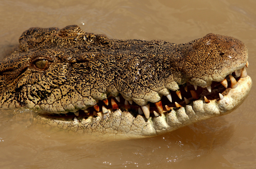

In [43]:
download_url(search_images_ddg('crocodile photos', max_images=1)[0], 'crocodile.jpg', show_progress=False)
Image.open('crocodile.jpg').to_thumb(256,256)

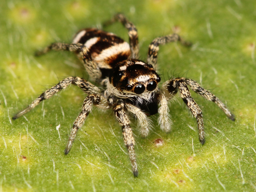

In [35]:
download_url(search_images_ddg('spider photos', max_images=1)[0], 'spider.jpg', show_progress=False)
Image.open('spider.jpg').to_thumb(256,256)

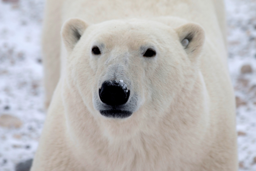

In [36]:
download_url(search_images_ddg('polar bear photos', max_images=1)[0], 'polarbear.jpg', show_progress=False)
Image.open('polarbear.jpg').to_thumb(256,256)

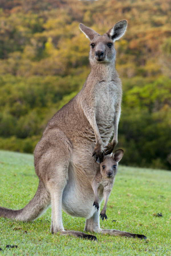

In [37]:
download_url(search_images_ddg('kangaroo photos', max_images=1)[0], 'kangaroo.jpg', show_progress=False)
Image.open('kangaroo.jpg').to_thumb(256,256)

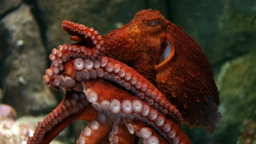

In [38]:
download_url(search_images_ddg('octopus photos', max_images=1)[0], 'octopus.jpg', show_progress=False)
Image.open('octopus.jpg').to_thumb(256,256)

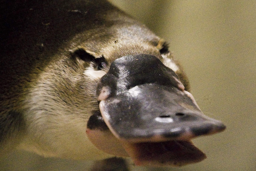

In [39]:
download_url(search_images_ddg('platypus photos', max_images=1)[0], 'platypus.jpg', show_progress=False)
Image.open('platypus.jpg').to_thumb(256,256)

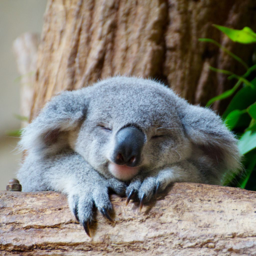

In [40]:
download_url(search_images_ddg('koala photos', max_images=1)[0], 'koala.jpg', show_progress=False)
Image.open('koala.jpg').to_thumb(256,256)

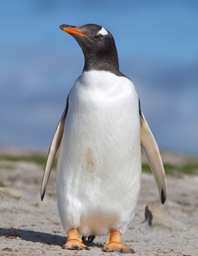

In [41]:
download_url(search_images_ddg('penguin photos', max_images=1)[0], 'penguin.jpg', show_progress=False)
Image.open('penguin.jpg').to_thumb(256,256)

In [44]:
searches = 'lion','elephant', 'crocodile', 'spider', 'polar bear', 'kangaroo', 'octopus', 'platypus', 'koala', 'penguin'
path = Path('animal_classifier')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} animal'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (95860800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [45]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


73

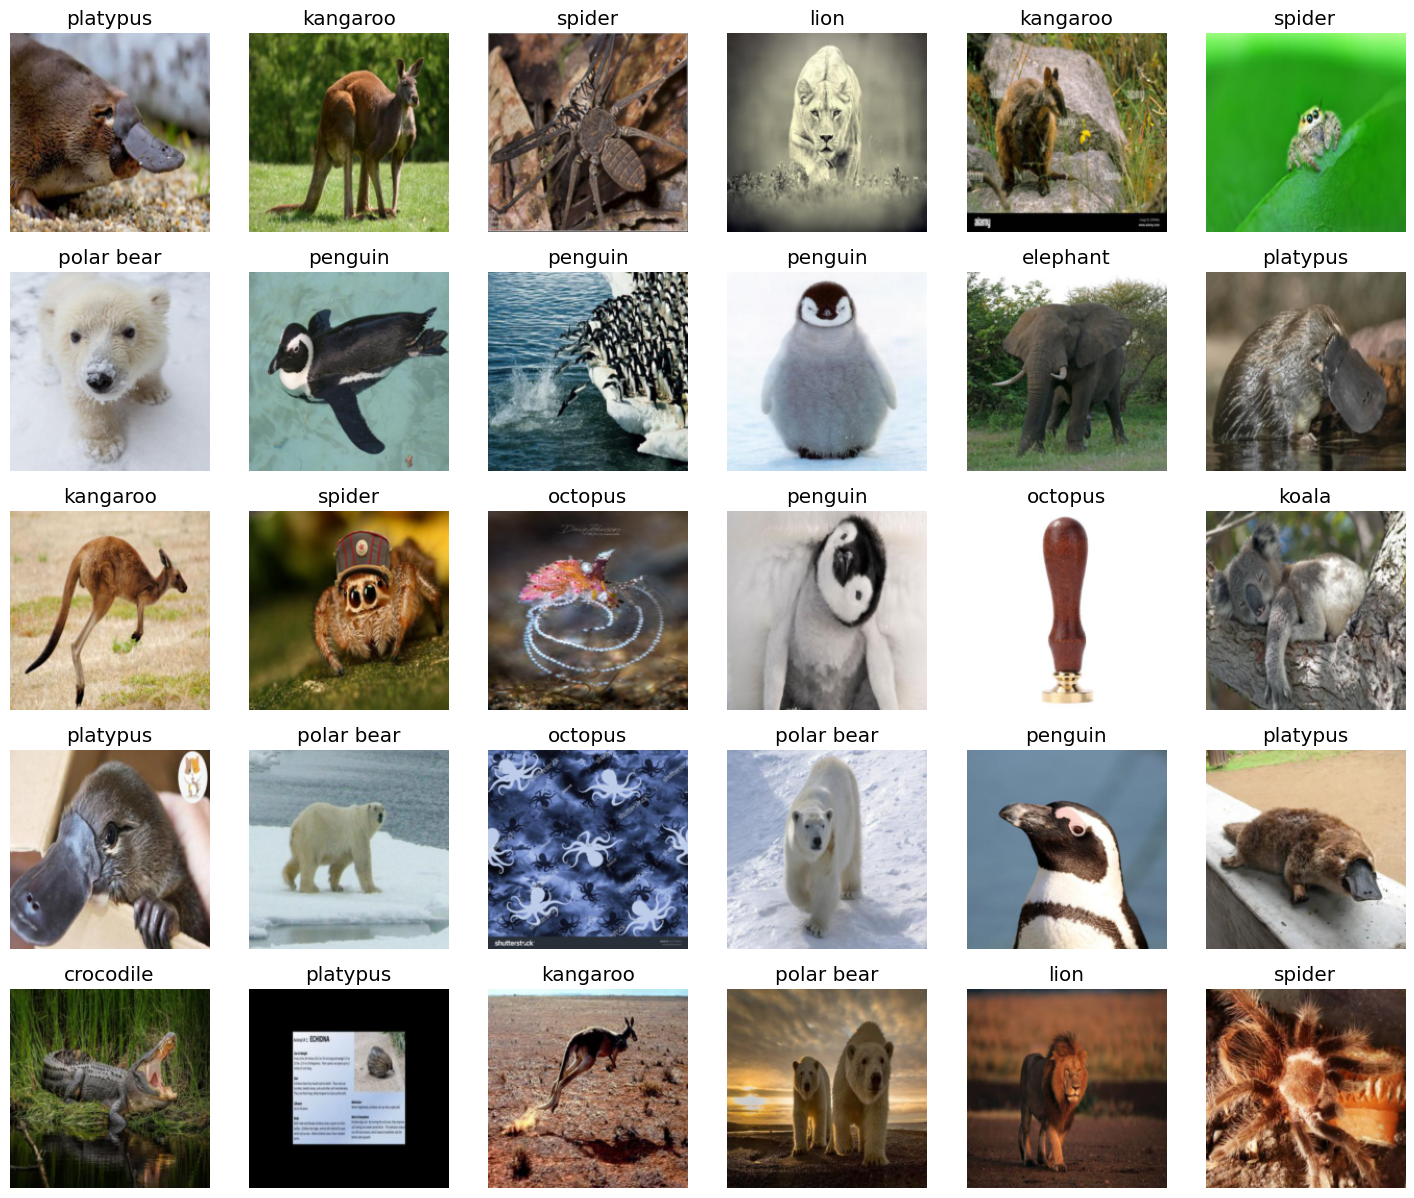

In [46]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=30)

In [47]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.807106,0.468451,0.137741,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.473923,0.409375,0.115702,00:10
1,0.321284,0.393627,0.107438,00:10
2,0.214250,0.385171,0.093664,00:08
3,0.144857,0.368133,0.088154,00:10
4,0.105349,0.385132,0.093664,00:10
5,0.076319,0.385973,0.099174,00:08
6,0.051737,0.378090,0.096419,00:10
7,0.037341,0.372614,0.093664,00:10
8,0.028520,0.373301,0.096419,00:08
9,0.020100,0.363597,0.093664,00:10


In [49]:
is_lion,_,probs = learn.predict(PILImage.create('lion.jpg'))
is_elephant,_,probs = learn.predict(PILImage.create('elephant.jpg'))
is_polar_bear,_,probs = learn.predict(PILImage.create('polarbear.jpg'))
is_penguin,_,probs = learn.predict(PILImage.create('penguin.jpg'))
is_kangaroo,_,probs = learn.predict(PILImage.create('kangaroo.jpg'))
is_koala,_,probs = learn.predict(PILImage.create('koala.jpg'))
is_octopus,_,probs = learn.predict(PILImage.create('octopus.jpg'))
is_platypus,_,probs = learn.predict(PILImage.create('platypus.jpg'))
is_spider,_,probs = learn.predict(PILImage.create('spider.jpg'))
is_crocodile,_,probs = learn.predict(PILImage.create('crocodile.jpg'))

print(f"This is a: {is_lion}.")
print(f"Probability it's a lion: {probs[0]:.4f}")
print(f"This is a: {is_elephant}.")
print(f"Probability it's a elephant: {probs[0]:.4f}")
print(f"This is a: {is_polar_bear}.")
print(f"Probability it's a polar bear: {probs[0]:.4f}")
print(f"This is a: {is_penguin}.")
print(f"Probability it's a penguin: {probs[0]:.4f}")
print(f"This is a: {is_kangaroo}.")
print(f"Probability it's a kangaroo: {probs[0]:.4f}")
print(f"This is a: {is_koala}.")
print(f"Probability it's a koala: {probs[0]:.4f}")
print(f"This is a: {is_octopus}.")
print(f"Probability it's a octopus: {probs[0]:.4f}")
print(f"This is a: {is_platypus}.")
print(f"Probability it's a platypus: {probs[0]:.4f}")
print(f"This is a: {is_spider}.")
print(f"Probability it's a spider: {probs[0]:.4f}")
print(f"This is a: {is_crocodile}.")
print(f"Probability it's a crocodile: {probs[0]:.4f}")

This is a: lion.
Probability it's a lion: 0.9999
This is a: elephant.
Probability it's a elephant: 0.9999
This is a: polar bear.
Probability it's a polar bear: 0.9999
This is a: penguin.
Probability it's a penguin: 0.9999
This is a: kangaroo.
Probability it's a kangaroo: 0.9999
This is a: koala.
Probability it's a koala: 0.9999
This is a: octopus.
Probability it's a octopus: 0.9999
This is a: platypus.
Probability it's a platypus: 0.9999
This is a: spider.
Probability it's a spider: 0.9999
This is a: crocodile.
Probability it's a crocodile: 0.9999


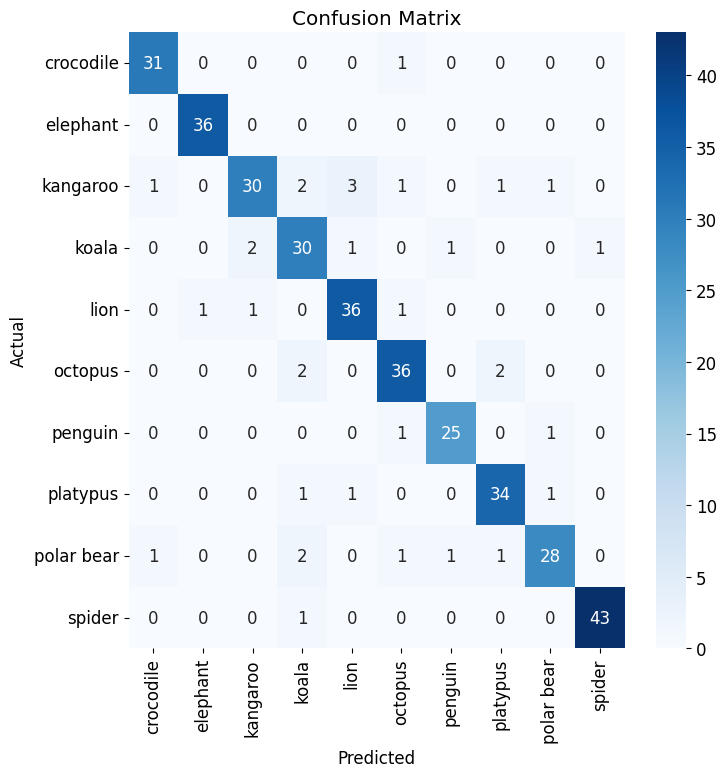

In [50]:
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions and targets for the validation dataset
preds, targets = learn.get_preds(dl=dls.valid)

# Compute the confusion matrix
cm = confusion_matrix(preds.argmax(dim=-1), targets)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=learn.dls.vocab, yticklabels=learn.dls.vocab)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

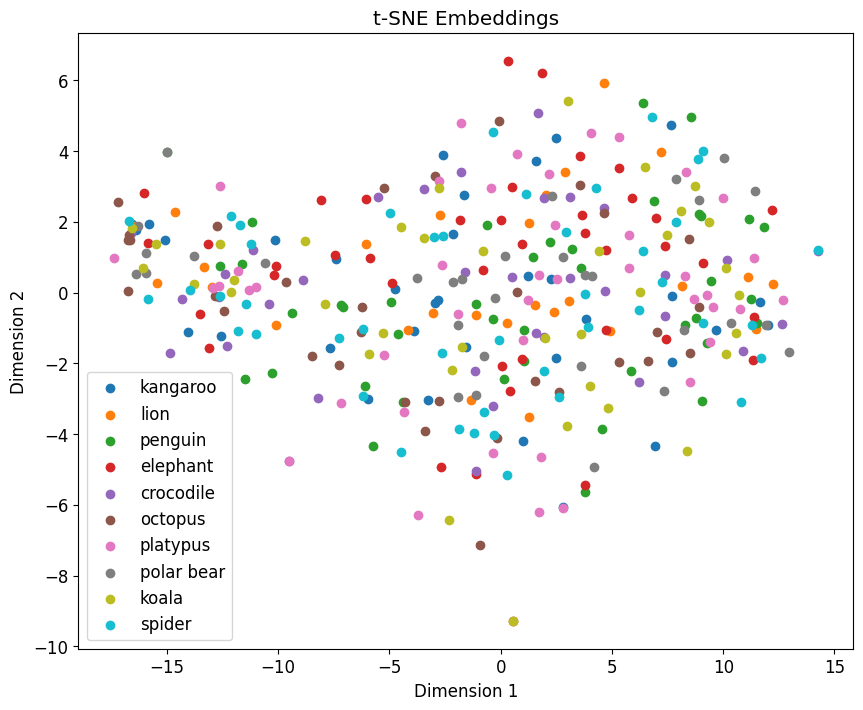

In [52]:
embeddings = learn.get_preds(with_input=True)[0].numpy()
num_samples, num_classes, height, width = embeddings.shape
embeddings_2d = embeddings.reshape(num_samples, num_classes * height * width)

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_2d)
labels = [str(parent.parent.name) for parent in dls.train.items]
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
for label in unique_labels:
    indices = [i for i, x in enumerate(labels) if x == label]
    valid_indices = [i for i in indices if i < len(embeddings_tsne)]
    plt.scatter(embeddings_tsne[valid_indices, 0], embeddings_tsne[valid_indices, 1], label=label)
plt.title("t-SNE Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()